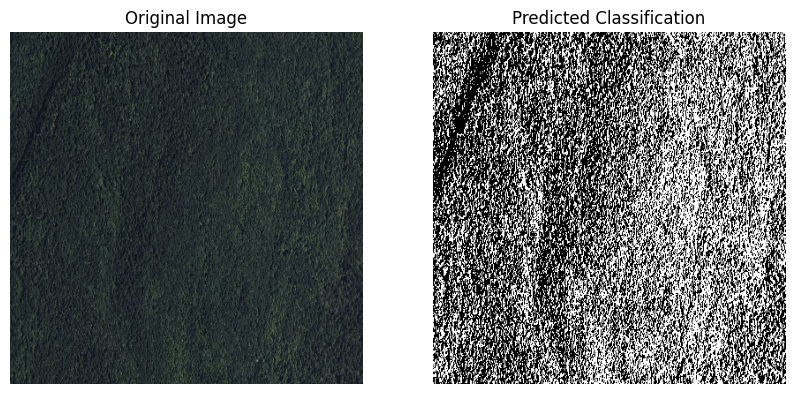

Green Area Percentage: 55.03%


In [22]:
# Step 2: Load the satellite image
image_path = 'dataset/SAS/image19.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Image not found at path {image_path}")
    exit()

# Convert the image to RGB (OpenCV loads images in BGR format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Resize the image for consistent processing
image = cv2.resize(image, (400, 400))  # Resize to 400x400 for simplicity

# Step 4: Flatten the image for clustering
pixels = image.reshape((-1, 3))

# Step 5: Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)
labels = kmeans.labels_

# Step 6: Reshape the labels back to image dimensions
height, width = image.shape[:2]
predicted_image = labels.reshape((height, width))

# Step 7: Visualize the classification result
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the classification result (Concrete vs Green)
plt.subplot(1, 2, 2)
plt.imshow(predicted_image, cmap='gray')  # Use 'gray' colormap for binary clusters
plt.title("Predicted Classification")
plt.axis('off')

plt.show()

# Step 8: Calculate the green area percentage
green_area_percentage = np.sum(predicted_image == 0) / predicted_image.size * 100
print(f"Green Area Percentage: {green_area_percentage:.2f}%")